# ATSSB_Prob52_SMA_SeasonalSimulation

In [1]:

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import math

from PythonTsa.plot_acf_pacf import acf_pacf_fig
from PythonTsa.LjungBoxtest import plot_LB_pvalue
from PythonTsa.ModResidDiag import plot_ResidDiag
from PythonTsa.datadir import getdtapath

plt.rcParams.update({
    "figure.figsize": (10,6),
    "figure.facecolor": "none",
    "axes.facecolor": "none",
    "savefig.transparent": True,
    "axes.grid": False,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "legend.frameon": False
})


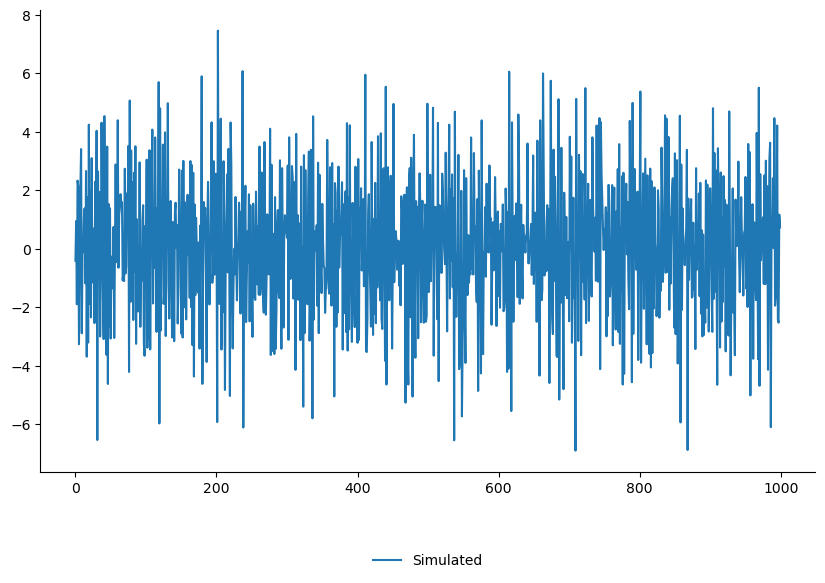

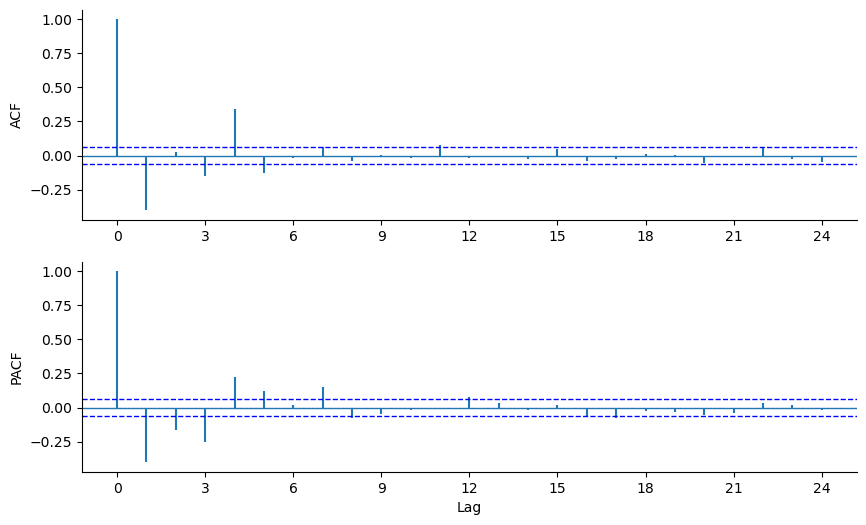

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                 1000
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 4)   Log Likelihood               -2117.873
Date:                           Sat, 21 Feb 2026   AIC                           4241.747
Time:                                   16:35:31   BIC                           4256.470
Sample:                                        0   HQIC                          4247.342
                                          - 1000                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4764      0.028    -17.146      0.000      -0.531      -0.422
ma.S.L4        0.4229      0.030     13.982

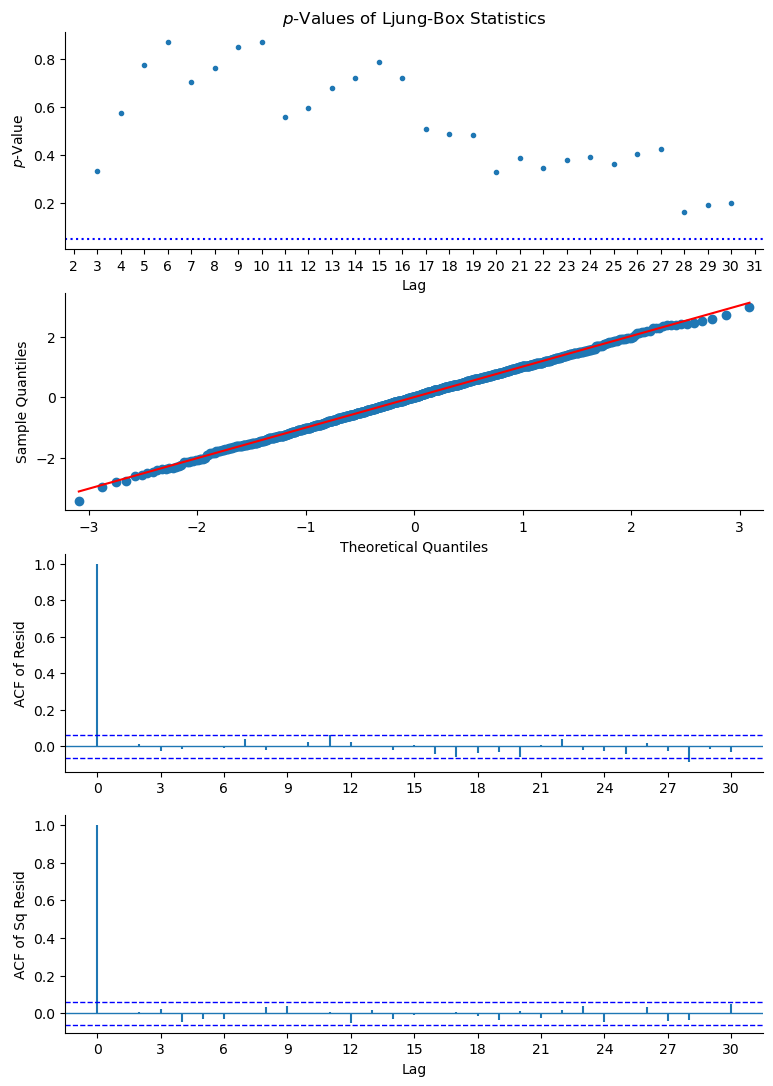

In [2]:

phi=np.r_[0.0]; theta=np.r_[-0.5]
Phi=np.r_[0.0]; Theta=np.r_[0.4]; sigma2=4
params=np.r_[phi,theta,Phi,Theta,sigma2]

sim = sm.tsa.SARIMAX([0],order=(1,0,1),seasonal_order=(1,0,1,4)).simulate(params,1000)
sim=pd.Series(sim)

sim.plot(label='Simulated')
plt.legend(loc='upper center', bbox_to_anchor=(0.5,-0.15))
plt.savefig("series.png", dpi=300); plt.savefig("series.pdf"); plt.show()

acf_pacf_fig(sim,both=True,lag=24)
plt.savefig("acf_pacf.png", dpi=300); plt.savefig("acf_pacf.pdf"); plt.show()

m=sm.tsa.SARIMAX(sim,order=(0,0,1),seasonal_order=(0,0,1,4)).fit(disp=False)
print(m.summary())

plot_ResidDiag(m.resid,2,30,30)
plt.savefig("diagnostics.png", dpi=300); plt.savefig("diagnostics.pdf"); plt.show()
